## UNAD

## Tarea 4_Algoritmos de Aprendizaje no Supervisado

## Datos de segmentación de clientes de centros comerciales

## Pasos de la actividad

In [84]:
#1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
#2.Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
#3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
#4.Entrenar el modelo configurando los diferentes hiperparámetros.
#5 Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.
#6 Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
#7 Interpretar, analizar y documentar los resultados obtenidos.
#Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/.

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [5]:
#Cargar las librerias necesarias


import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones


# librerías de para implementar modelo Kmeans
from sklearn.cluster import AgglomerativeClustering #algoritmos de agrupamiento o clustering, dividir datos en grupos o clusters basados en su similitud.
from sklearn.preprocessing import StandardScaler #escalar o normalizar los datos
from scipy.cluster.hierarchy import linkage, dendrogram #herramientas para realizar agrupamiento jerárquico y visualización de dendrogramas.
#dendrogram:  genera un gráfico de árbol

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from datetime import datetime

#Librería para evitar la advertencia de que el modelo tiene una pérdida de memoria en Windows
import warnings
warnings.filterwarnings('ignore')

In [9]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('C:/UNAD_TAREA_4/BD/Mall_Customers.csv')

In [11]:
#Lectura de datos y análisis correspondiente
Datos.head(100)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
95,96,Male,24,60,52
96,97,Female,47,60,47
97,98,Female,27,60,50
98,99,Male,48,61,42


In [5]:
#Idéntificaciíon única asignada al cliente-genero-edad-ingresos anuales-puntuacióin de gasto.

In [13]:
# Descripción de los datos
Datos.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [15]:
# Obtener informacióin sobrel tipo de datos y el total de valores en cada columna
print(Datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

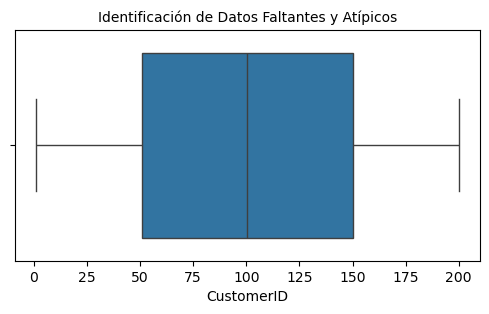

In [17]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['CustomerID'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

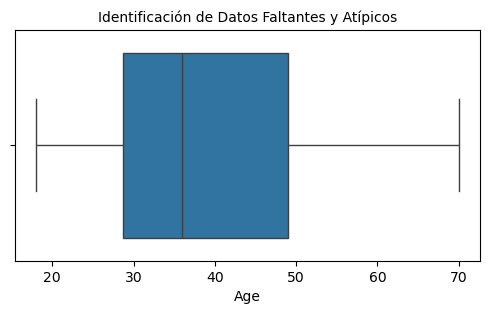

In [19]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [21]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en Edad: ",Datos['CustomerID'].isin([0]).sum())
print("Cantidad de Registros con cero en Salario: ",Datos['Age'].isin([0]).sum())

Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Salario:  0


In [25]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

Datos['CustomerID']=Datos['CustomerID'].replace(0,Datos['CustomerID'].mean())

In [12]:
#Idéntificar columnas con datos faltantes
print(Datos.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Text(0.5, 1.0, 'identificacion de datos')

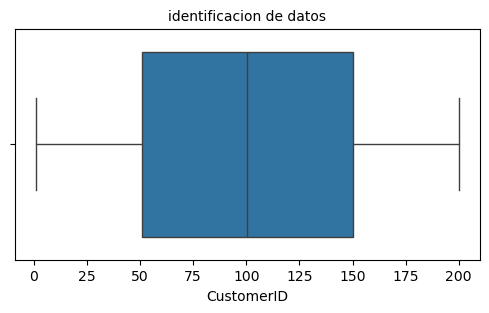

In [27]:
# Idéntificar valores atípicos
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['CustomerID'])
plt.title('identificacion de datos', fontsize=10)

In [29]:
#Conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((Datos['Age']<nivel_minimo)|(Datos['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [31]:
#Conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((Datos['CustomerID']<nivel_minimo)|(Datos['CustomerID']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 100


In [33]:
# Filtra Datos Atípicos

Datos=Datos[(Datos['Age']<nivel_maximo)&(Datos['Age']>nivel_minimo)]

In [35]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [37]:
# Filtra Datos Atípicos

Datos=Datos[(Datos['CustomerID']<nivel_maximo)&(Datos['CustomerID']>nivel_minimo)]

In [19]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              99 non-null     int64 
 1   Gender                  99 non-null     object
 2   Age                     99 non-null     int64 
 3   Annual Income (k$)      99 non-null     int64 
 4   Spending Score (1-100)  99 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 4.6+ KB


## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [39]:
print(Datos.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [41]:
# Filtrar columnas del modelo

Datos1 = Datos[["Age","Gender","Annual Income (k$)","Spending Score (1-100)"]]

In [43]:
# Revisión de los datos de las variables objetivo
Datos1.head(40)

,Age,Gender,Annual Income (k$),Spending Score (1-100)
0,19,Male,15,39
1,21,Male,15,81
2,20,Female,16,6
3,23,Female,16,77
4,31,Female,17,40
5,22,Female,17,76
6,35,Female,18,6
7,23,Female,18,94
8,64,Male,19,3
9,30,Female,19,72


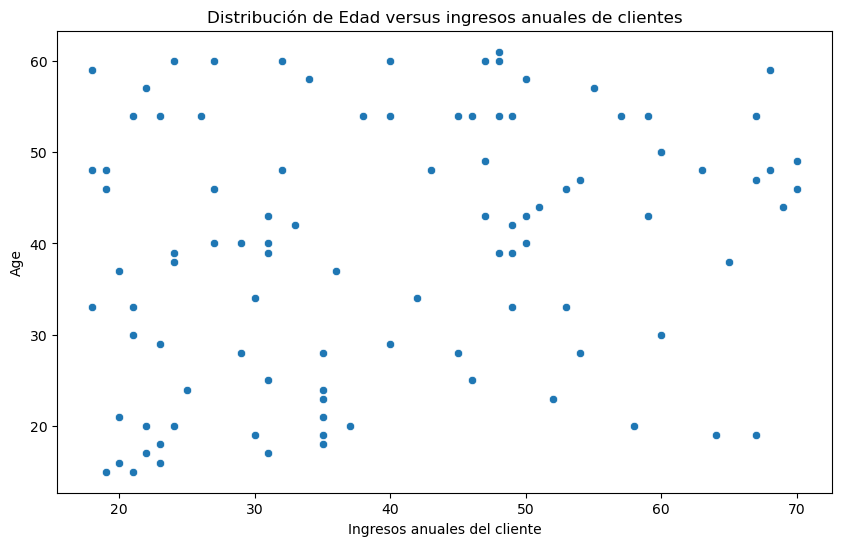

In [45]:
# Grafica antes del agrupamiento

plt.figure(figsize=(10, 6))
sns.scatterplot(x=Datos1['Age'], y=Datos1['Annual Income (k$)'])
plt.title('Distribución de Edad versus ingresos anuales de clientes')
plt.xlabel('Ingresos anuales del cliente')
plt.ylabel('Age')
plt.show()

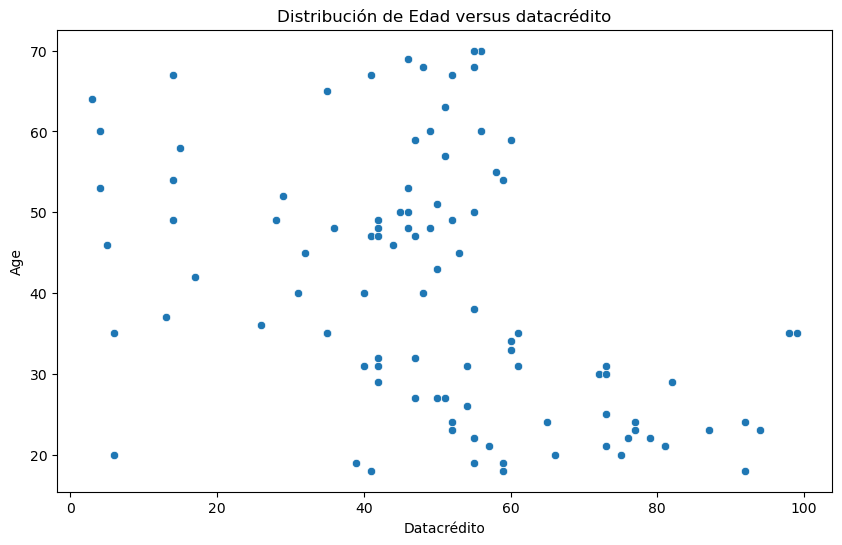

In [47]:
# Grafica antes del agrupamiento

plt.figure(figsize=(10, 6))
sns.scatterplot(x=Datos1['Spending Score (1-100)'], y=Datos1['Age'])
plt.title('Distribución de Edad versus datacrédito')
plt.xlabel('Datacrédito')
plt.ylabel('Age')
plt.show()

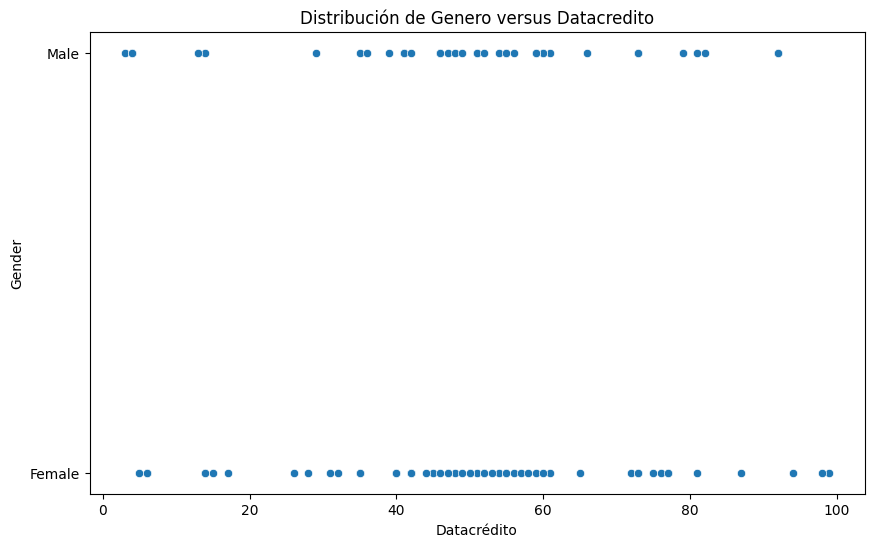

In [25]:
# Grafica antes del agrupamiento

plt.figure(figsize=(10, 6))
sns.scatterplot(x=Datos1['Spending Score (1-100)'], y=Datos1['Gender'])
plt.title('Distribución de Genero versus Datacredito')
plt.xlabel('Datacrédito')
plt.ylabel('Gender')
plt.show()

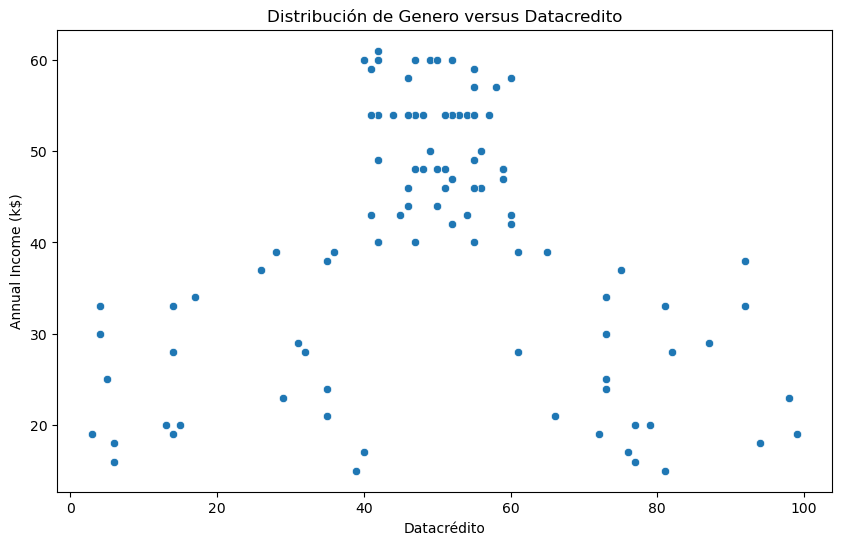

In [49]:
# Grafica antes del agrupamiento

plt.figure(figsize=(10, 6))
sns.scatterplot(x=Datos1['Spending Score (1-100)'], y=Datos1['Annual Income (k$)'])
plt.title('Distribución de Genero versus Datacredito')
plt.xlabel('Datacrédito')
plt.ylabel('Annual Income (k$)')
plt.show()

## 4. Entrenar el modelo configurando los diferentes hiperparámetros

In [51]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Datos[['Annual Income (k$)', 'Spending Score (1-100)']])

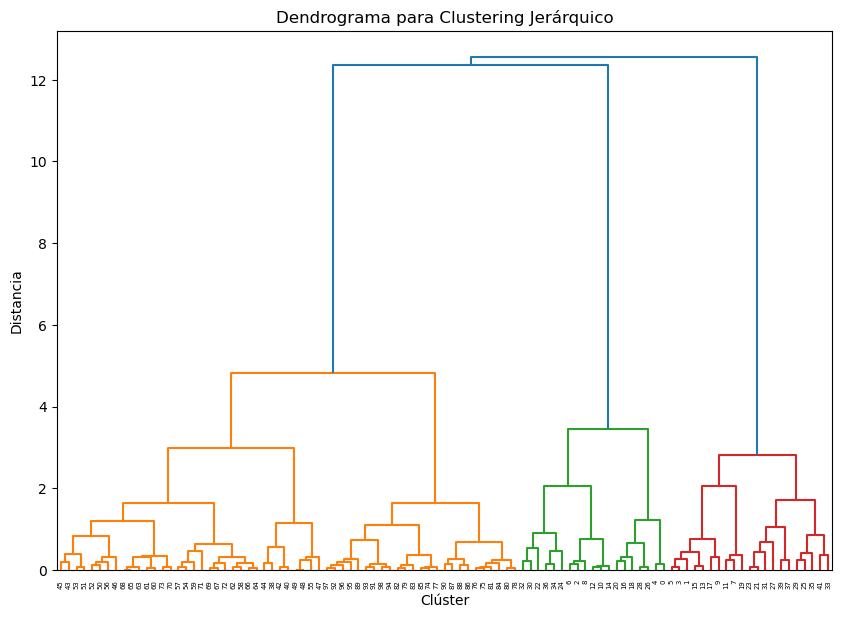

In [53]:
# Check for and handle non-finite values in scaled_data
scaled_data = np.nan_to_num(scaled_data)  # Reemplaza valores NaN, inf y -inf con valores finitos

# Continue with hierarchical clustering
linked = linkage(scaled_data, method='ward') # Realiza el enlace jerárquico con el método de Ward

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False) # Dibuja el dendrograma
plt.title('Dendrograma para Clustering Jerárquico')
plt.xlabel('Clúster')
plt.ylabel('Distancia')
plt.show()

## Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc

In [55]:
# Assuming 'Datos' is your DataFrame
# Replace NaNs with the mean of each column
Datos[[ 'Annual Income (k$)', 'Spending Score (1-100)']] = Datos[['Annual Income (k$)', 'Spending Score (1-100)']].fillna(Datos[['Annual Income (k$)', 'Spending Score (1-100)']].mean())

# Preprocesamiento de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Datos[['Annual Income (k$)', 'Spending Score (1-100)']])

# Entrenamiento del modelo de Clustering Jerárquico
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = model.fit_predict(scaled_data)

# Evaluación del modelo

# Coeficiente de Silhouette
sil_score = silhouette_score(scaled_data, labels)
print(f"Coeficiente de Silhouette: {sil_score}")

# Índice de Calinski-Harabasz
ch_score = calinski_harabasz_score(scaled_data, labels)
print(f"Índice de Calinski-Harabasz: {ch_score}")

# Índice de Davies-Bouldin
db_score = davies_bouldin_score(scaled_data, labels)
print(f"Índice de Davies-Bouldin: {db_score}")

Coeficiente de Silhouette: 0.603353690258569
Índice de Calinski-Harabasz: 175.01024019316128
Índice de Davies-Bouldin: 0.5389204754713809


## 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

Silhouette Score: 0.603353690258569


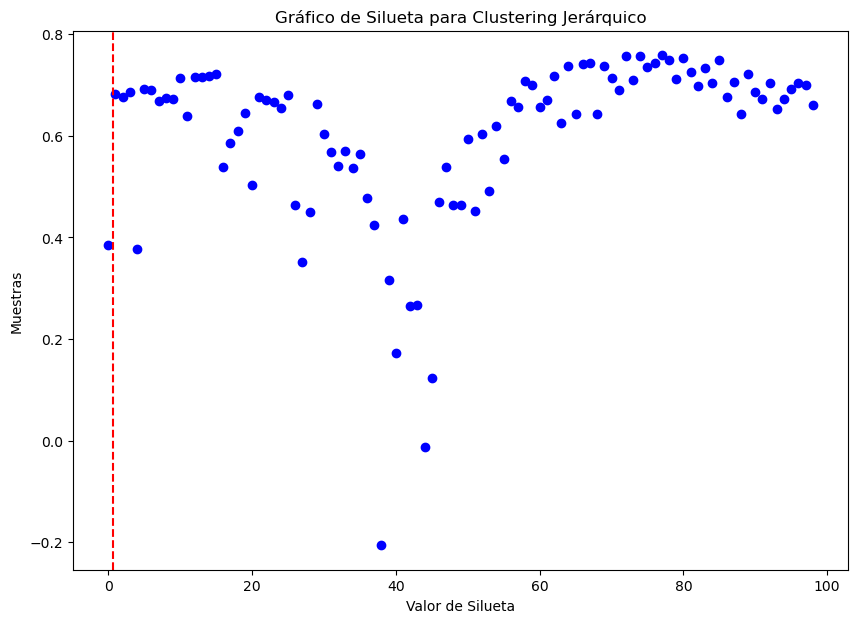

In [57]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

# Calcular la silueta
silhouette_avg = silhouette_score(scaled_data, model.labels_)
print(f'Silhouette Score: {silhouette_avg}')

# Mostrar el gráfico de silueta
sample_silhouette_values = silhouette_samples(scaled_data, model.labels_)
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(sample_silhouette_values, 'bo')
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_title("Gráfico de Silueta para Clustering Jerárquico")
ax.set_xlabel("Valor de Silueta")
ax.set_ylabel("Muestras")
plt.show()

## Gráfico de Dispersión para Visualización de Clusters

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

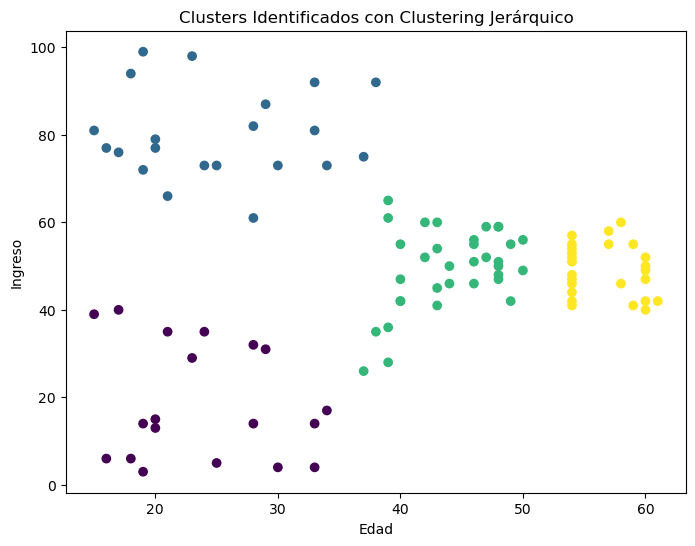

In [72]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Aplicar el modelo de clustering jerárquico
model = AgglomerativeClustering(n_clusters=4)  # Ajustar el número de clusters
Datos1['Cluster'] = model.fit_predict(scaled_data)
# Graficar los clusters
plt.figure(figsize=(8, 6))
plt.scatter(Datos['Annual Income (k$)'], Datos['Spending Score (1-100)'], c=Datos1['Cluster'], cmap='viridis')
plt.title('Clusters Identificados con Clustering Jerárquico')
plt.xlabel('Edad')
plt.ylabel('Ingreso')
plt.show()

## 7. Interpretar, analizar y documentar los resultados obtenidos

In [76]:
# Análisis

## 8. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/

## Realizado por:

## Manuel Hernández
## Estiven Romero
## Andrey Quitián 